# Интерполяция (3 метода) - базовый вариант




### 1) Кусочно-линейная интерполяция на неравномерной сетке



График по интерполированным данным z, f:


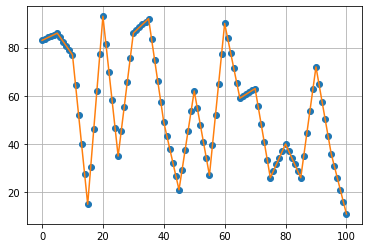

Время вычисления: 0.0010986328125


In [51]:
##### Кусочно-линейная интерполяция на неравномерной сетке #####

import matplotlib.pyplot as plt
import time

# Функция для вычисления значения функции в точке dest по исходным спискам данных x, y
def linear(dest, x, y):
    
    n = len(x)
    
    if dest == x[n-1]:     # Если совпадает с правым краем, возвращаем значение в этой точке
        return y[n-1]
    
    if (dest < x[0] or dest > x[n-1]):   # Если число выходит за сетку, выходим с ошибкой (задача экстраполяции)
        print('Число выходит за начальные границы')
        return

    for i in range(n-1):   # Ищем индексы левого и правого соседей заданного x
        if x[i] <= dest:   # left, right
            left = i           
        if x[i+1] > dest:
            right = i+1
            break
            
    dest_y = (y[right] - y[left]) / (x[right] - x[left])
    dest_y *= (dest - x[left])
    dest_y += y[left]
    
    return dest_y



f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w+')     # Файл для записи данных f 

x = [int(i) for i in f1.read().split()]
y = [int(i) for i in f2.read().split()]
z = [int(i) for i in f3.read().split()]


# Интерполирование: вычисление значений в точках z:
f = [0] * len(z)

start = time.time()
for i in range(len(z)):
    f[i] = linear(z[i], x, y)
stop = time.time()

for i in range(len(f)):
    f4.write('%d\n' % f[i])

print('\nГрафик по интерполированным данным z, f:')
plt.plot(z, f, 'o', z, f)
plt.grid(True)
plt.show()

f1.close()
f2.close()
f3.close()
f4.close()
print('Время вычисления:', stop - start)


#
#
#

### 2) Интерполяция Лагранжа на неравномерной сетке ###
###  Асимптотика: O(mn²)

График по интерполированным данным z, f:


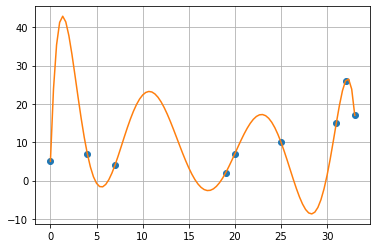

In [2]:
### Интерполяция Лагранжа на неравномерной сетке ###
###  Асимптотика: O(mn²)

import numpy as np
import matplotlib.pyplot as plt
import time

def phi(i, dest):        # Вычисление i-той базисной функции
    n = len(x)
    
    p = 1
    for j in range(0, n):
        if i != j:
            p = p * (dest - x[j]) / (x[i] - x[j])
    return p


def P(dest):
    n = len(x)
    
    s = 0
    for i in range(n):
        s = s + y[i] * phi(i, dest)
    return s


f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w+')     # Файл для записи данных f 

x = [int(i) for i in f1.read().split()]
y = [int(i) for i in f2.read().split()]
z = [int(i) for i in f3.read().split()]

x = np.array(x, dtype=float)             # Теперь это numpy массивы
y = np.array(y, dtype=float)
#z = np.array(z, dtype=float)            # Можем читать из файла
z = np.linspace(np.min(x),np.max(x),100) # или для проверки результата вычислить значения в 100 точках
f = np.zeros(len(z))


for i in range(len(z)):  # вычиление
    f[i] = P(z[i])
for i in range(len(z)):  # запись в файл
    f4.write('%d\n' % f[i])
    
    
print('График по интерполированным данным z, f:')
plt.plot(x, y, 'o', z, f)
plt.grid(True)
plt.show()

f1.close()
f2.close()
f3.close()
f4.close()



# из-за большой погрешности и разбросу данных возьмем небольшую сетку

###

### 3) Интерполяция методом кубических сплайнов на равномерной сетке

A: [ 0.         -0.03317474  0.22869896 -0.45762111  0.48178548 -0.3815208
  0.17229772  0.0523299   0.01038266 -0.21386056  0.29305957 -0.35037773
  0.32445134 -0.19542764  0.17725921 -0.1856092   0.15717758 -0.21910114
  0.23922697 -0.08180674  0.        ]
B: [ 0.          0.49762111 -3.43048444  6.86431665 -7.22678216  5.72281201
 -2.58446587 -0.78494854 -0.15573996  3.20790838 -4.39589358  5.25566592
 -4.86677012  2.93141456 -2.65888813  2.78413797 -2.35766376  3.28651708
 -3.58840455  1.22710114  0.        ]
C: [ 0.6        -3.45873703 -0.96505187 -7.2810555  12.48927388 -8.87604003
  9.81488622 -5.98350486 -5.0808668  -2.49302795  7.65297859 -4.91888642
 10.02256707 -8.97138188  1.46296045 -6.48045992  5.05887921 -1.75505693
  4.76134852 -9.09033713  0.        ]
D: [83. 86. 77. 15. 93. 35. 86. 92. 49. 21. 62. 27. 90. 59. 63. 26. 40. 26.
 72. 36.  0.]


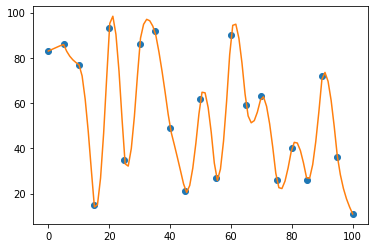

Время вычислений: 0.0024492740631103516


In [50]:
### Интерполяция методом кубических сплайнов на равномерной сетке ###

import numpy as np
import matplotlib.pyplot as plt
import time

def sweep (a, b, c, f):       # В ходе отыскания коэффициентов многочленов будет нужна
    n = f.size                #      функция для решения СЛАУ методом прогонки
    
    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0
    
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d
        
    x[n] = 0
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    x = x[:-1]    
    return x



def generateSpline(x, y):           # Коэффициенты строим здесь
    n = x.shape[0] - 1
    h = (x[n] - x[0]) / n
    
    a = np.array([0] + [1] * (n - 1) + [0])
    b = np.array([1] + [4] * (n - 1) + [1])
    c = np.array([0] + [1] * (n - 1) + [0])
    f = np.zeros(n + 1)
    
    for i in range(1, n):
        f[i] = 3 * (y[i-1] - 2 * y[i] + y[i+1]) / (h**2)
    s = sweep(a, b, c, f)
    
    A = np.zeros(n+1)
    B = np.zeros(n+1)
    C = np.zeros(n+1)
    D = np.zeros(n+1)
    
    for i in range(n):
        B[i] = s[i]
        A[i] = (B[i+1] - B[i]) / (3 * h)
        C[i] = (y[i+1] - y[i]) / h - (B[i+1] + 2 * B[i]) * h / 3
        D[i] = y[i]
 
    return A, B, C, D


 
def findValue(dest, x, y, A, B, C, D):       # возвращает значение функции в точке dest
    n = len(x)
    
    if dest == x[n-1]:
        return y[n-1]
    
    if dest < x[0] or dest > x[n-1]:
        print('Число %d выходит за область интерполирования' % dest)
        return
    
    for i in range(1, n):            # Ищем индекс левого соседа числа dest
        if dest < x[i]:
            left = i - 1
            break
            
    P = A[left] * ((dest - x[left])**3)
    P += B[left] * ((dest - x[left])**2)
    P += C[left] * (dest - x[left])
    P += D[left]
        
    return P




f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w+')     # Файл для записи данных f 

x = [int(i) for i in f1.read().split()]
y = [int(i) for i in f2.read().split()]
z = [int(i) for i in f3.read().split()]

x = np.array(x, dtype=float)             # Теперь это numpy массивы
y = np.array(y, dtype=float)
#z = np.array(z, dtype=float)            # Можем читать из файла
z = np.linspace(np.min(x),np.max(x), 100) # или для проверки результата вычислить значения в 100 точках
f = np.zeros(len(z))


A, B, C, D = generateSpline(x, y)
print('A:', A)
print('B:', B)
print('C:', C)
print('D:', D)

start = time.time()
for i in range(len(z)):
    f[i] = findValue(z[i], x, y, A, B, C, D)
stop = time.time()

for i in range(len(z)):
    f4.write('%f\n' % f[i])
 
    
plt.plot(x, y, 'o', z, f)
plt.show()

print('Время вычислений:', stop - start)
    
f1.close()
f2.close()
f3.close()
f4.close()